# HOW CAN BIKE SHARING BE IMPROVED?

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTWDqOysUY5UmMVVd68LSCamqna8IteZ32ZiuGR4_c3ryYO-peRtp87TgEFWAfUCHearw&usqp=CAU)

Case study as based on Learn with Google Data Analytics Specialization [Capstone](https://d3c33hcgiwev3.cloudfront.net/ymogSWd_R2ujQawZle3_rQ_12891ea7af0a487bad109a95d513b2f1_DA-C8-Case-Study-1-PDF.pdf?Expires=1698192000&Signature=Me0B~9IBdwrJZmTNa-NrlfT78owxIGCGUyG8pKLYFc5xai07Y0XCqyrZ4SGBU6YLILI4NOO2sO4L-ygL6zAjXn8jXVmoqZ~hOxl5Eoa0kP7eJDQVyp5JbSWfzMDch-j0L6rO1VdzmeQk8pOWIZGHrxDjhNEhRU1fmi3-XqZVm6o_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A)

# Scenario

You are a junior data analyst working in the marketing analyst team at Divvy, a bike-share company in Chicago. The director of
marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your
team wants to understand how casual riders and annual members use Divvy bikes differently. From these insights, your team will
design a new marketing strategy to convert casual riders into annual members. But first, Divvy executives must approve your
recommendations, so they must be backed up with compelling data insights and professional data visualizations.

# Dataset

Datasets made available by Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement) and include Divvy's trip data from January 2023 to June 2023.

# Data Analytics Process

## 1. Ask

1. How do *annual members* and *casual riders* use Divvy bikes differently? <br>
2. *Why* would casual riders buy Divvy *annual memberships*? <br>
3. How can Divvy use *digital media* to influence casual riders to become *members*? <br>

## 2. Prepare

In [2]:
# Loading libraries and import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

divvy_0123 = pd.read_csv("divvy_data/202301-divvy-tripdata.csv")
divvy_0223 = pd.read_csv("divvy_data/202302-divvy-tripdata.csv")
divvy_0323 = pd.read_csv("divvy_data/202303-divvy-tripdata.csv")
divvy_0423 = pd.read_csv("divvy_data/202304-divvy-tripdata.csv")
divvy_0523 = pd.read_csv("divvy_data/202305-divvy-tripdata.csv")
divvy_0623 = pd.read_csv("divvy_data/202306-divvy-tripdata.csv")

In [3]:
# Join all months
divvy16 = pd.concat([divvy_0123,divvy_0223,divvy_0323,divvy_0423,divvy_0523,divvy_0623])

In [4]:
# Check for null values
divvy16.isna().sum()

# Fill null values
divvy16['start_station_name'] = divvy16['start_station_name'].fillna('Unknown Start')
divvy16['end_station_name'] = divvy16['end_station_name'].fillna('Unknown End')

divvy16.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
719613,D7BBF4BCBB72DA32,classic_bike,2023-06-30 12:58:56,2023-06-30 13:41:25,Fairbanks Ct & Grand Ave,TA1305000003,California Ave & Milwaukee Ave,13084,41.891847,-87.620580,41.922695,-87.697153,casual
719614,9A1685F9A39646CA,electric_bike,2023-06-29 19:56:44,2023-06-29 20:09:15,Fairbanks Ct & Grand Ave,TA1305000003,Unknown End,NaN,41.891970,-87.620198,41.890000,-87.610000,casual
719615,CD4CC5A60881C7AF,electric_bike,2023-06-25 00:27:20,2023-06-25 00:39:09,Clark St & Lincoln Ave,13179,Unknown End,NaN,41.915745,-87.634604,41.920000,-87.650000,casual
719616,FF6594685CFE2056,electric_bike,2023-06-24 21:26:57,2023-06-24 21:28:44,Fairbanks Ct & Grand Ave,TA1305000003,Unknown End,NaN,41.891725,-87.620607,41.890000,-87.620000,casual
719617,66EF9F3C318208B9,classic_bike,2023-06-24 21:30:30,2023-06-25 22:30:07,Fairbanks Ct & Grand Ave,TA1305000003,Unknown End,NaN,41.891847,-87.620580,NaN,NaN,casual


## 3. Process

In [5]:
# Transform object columns to datetime columns
import datetime as dt
divvy16['started_at'] = pd.to_datetime(divvy16['started_at'], format='%Y-%m-%d %H:%M:%S')
divvy16['ended_at'] = pd.to_datetime(divvy16['ended_at'], format='%Y-%m-%d %H:%M:%S')

# Find weekday and month of year
divvy16['day_of_week'] = divvy16['started_at'].dt.strftime('%A')

# Find ride length in form days - hh:mm:ss
divvy16['ride_length'] = divvy16['ended_at'] - divvy16['started_at']

divvy16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2390459 entries, 0 to 719617
Data columns (total 15 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  day_of_week         object         
 14  ride_length         timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(8), timedelta64[ns](1)
memory usage: 291.8+ MB


In [6]:
# Transform ride_length into hh:mm:ss format
# Convert days to hours and add it to the time component
divvy16['ride_length'] = divvy16['ride_length'].dt.total_seconds()/3600

In [7]:
# Drop unused columns 
divvy16 = divvy16.drop(['ended_at','start_station_id','end_station_id','start_lat','end_lat','start_lng','end_lng'], axis = 1)
divvy16.head(3)
divvy16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2390459 entries, 0 to 719617
Data columns (total 8 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   start_station_name  object        
 4   end_station_name    object        
 5   member_casual       object        
 6   day_of_week         object        
 7   ride_length         float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 164.1+ MB


## 4. Analyze

### a. Number of rides from Jan-Jun 2023 (Member vs. Casual)

**The total of rides made by members and casual riders in the first half of 2023 is:**

In [8]:
print(divvy16.groupby('member_casual')['ride_id'].count())

member_casual
casual     827921
member    1562538
Name: ride_id, dtype: int64


More rides are made by members than casual riders. Let's dive deeper into how and when these rides are made.

### b. Rides per week day (Member vs. Casual)

**The total number of rides in the first half of 2023 is:**

In [9]:
print(divvy16.size)

19123672


The number of ride for each day in a week is:

In [10]:
divvy_weekride = divvy16.groupby(['day_of_week']).size().reset_index(name='count')
divvy_weekride.set_index('day_of_week')
print(divvy_weekride.sort_values(by='count', ascending=False))


  day_of_week   count
4    Thursday  368519
6   Wednesday  362762
0      Friday  360875
2    Saturday  356883
5     Tuesday  346932
1      Monday  301499
3      Sunday  292989


To expand on this, let's look at a visualization:

c:\Users\bi020\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bi020\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bi020\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bi020\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

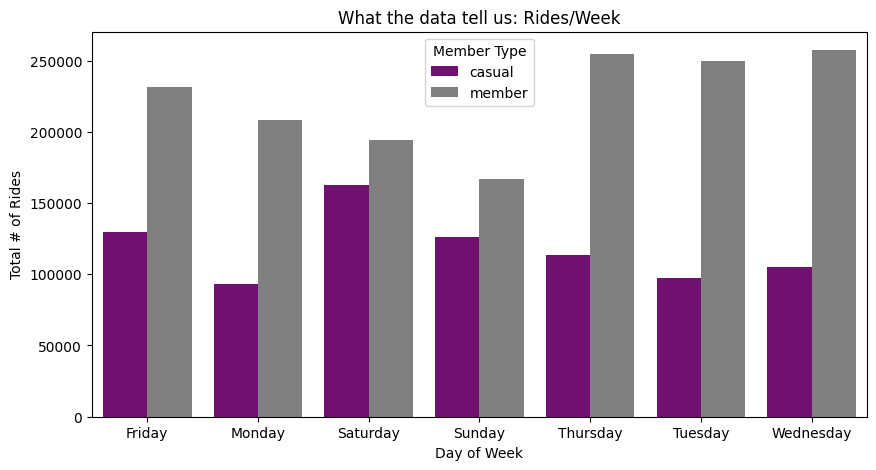

In [11]:
divvy_weekride = divvy16.groupby(['day_of_week','member_casual']).size().reset_index(name='count')

# Create a bar plot using seaborn
color_mc = {"casual": "purple", "member": "grey"}
plt.figure(figsize=(10, 5))
sns.barplot(x='day_of_week', y='count', hue='member_casual', data=divvy_weekride, palette=color_mc)

# Customize
plt.title('What the data tell us: Rides/Week')
plt.xlabel('Day of Week')
plt.ylabel('Total # of Rides')

# Show plot
plt.legend(title='Member Type')
plt.show()

Based on the visualization, the number of rides taken by Member usually doubles that of Casual riders, except on Saturday and Sunday. This could be because of the time off during weekend, which prompt more people to take a ride around the city. <br>
However, it is also worth noticing that Member's number of rides are higher toward weekdays. A propable explanation for this would be that riders with membership use the service to commute daily. This is a point worth noticing when working on a marketing strategy.

### c. Average hours per week day (Member vs. Casual)

Another visualization worth taking a look at is the average time spent between a member and a casual rider on any day of a week.

c:\Users\bi020\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bi020\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bi020\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bi020\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

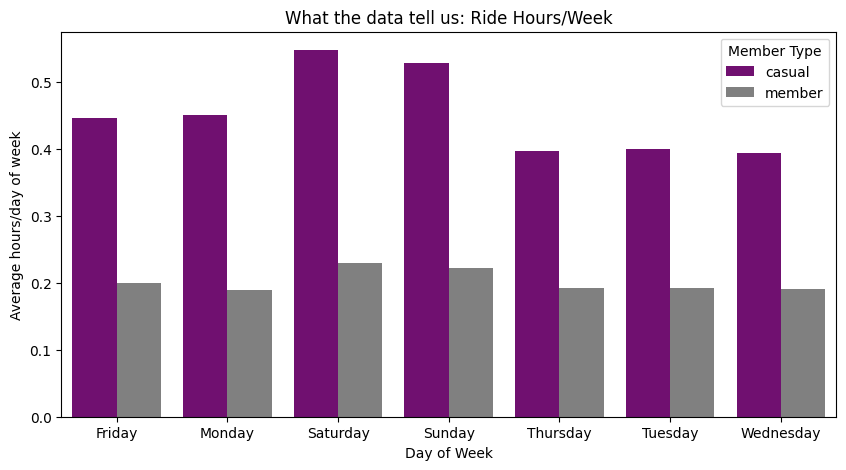

In [12]:
# Calculate the mean ride time in hours per day of the week and member type
divvy_weekhour = divvy16.groupby(['member_casual', 'day_of_week'])['ride_length'].mean().reset_index()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='day_of_week', y='ride_length', hue='member_casual', data=divvy_weekhour, palette=color_mc)

# Customize
plt.title('What the data tell us: Ride Hours/Week')
plt.xlabel('Day of Week')
plt.ylabel('Average hours/day of week')

# Show plot
plt.legend(title='Member Type')
plt.show()

Interestingly enough, casual riders typically ride for double the time of those with memberships. This data indeed solidifies the hypothesis that members are those who ride to and from a point on a daily basis, at a shorter distance, for which purchasing a membership would be more beneficial. On the contrary, non-members longer hours are likely spent on leisure/exercises or emergency commutes that are not planned ahead, and when no other methods of transportation might be available.<br>
Given that the number of member rides are higher than casual ones (see 4a.), it can be said with a definite certainty that the claims above are likely to be true.

### d. Rides per hour of day (Member vs. Casual)

Another data worth looking at is what hours are rides typically made:

c:\Users\bi020\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bi020\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bi020\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bi020\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

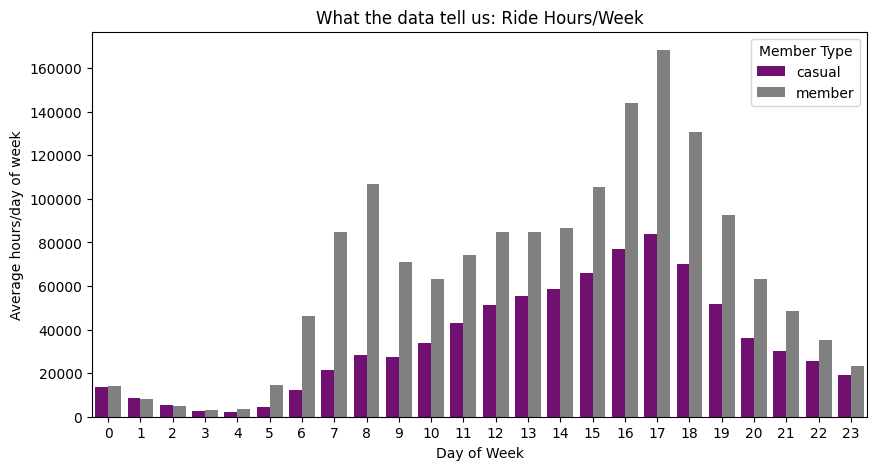

In [13]:
# Find the starting hour for rides
divvy16['started_hour'] = divvy16['started_at'].dt.hour
divvy_hourly = divvy16.groupby(['member_casual', 'started_hour'])['ride_id'].count().reset_index()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='started_hour', y='ride_id', hue='member_casual', data=divvy_hourly, palette=color_mc)

# Customize
plt.title('What the data tell us: Ride Hours/Week')
plt.xlabel('Day of Week')
plt.ylabel('Average hours/day of week')

# Show plot
plt.legend(title='Member Type')
plt.show()

As predicted, members' rides soar at around 8:00 and 17:00, which matches the start and end of a workday. Non-members' rides are also a little higher around these times, though not as distinct and only toward the afternoon, which might be as they choose cycling as a way to relax after a long day.

### e. Preferred type of bikes

Let's see which bike is more preferable within our riders:

In [14]:
print(divvy16.groupby('rideable_type')['ride_id'].count())

rideable_type
classic_bike     1040444
docked_bike        43906
electric_bike    1306109
Name: ride_id, dtype: int64


Electric bikes are most used, which is understandable thanks to their convenience. We also check for any connection between the choice of bike and the length of different rides:

c:\Users\bi020\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bi020\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bi020\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bi020\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

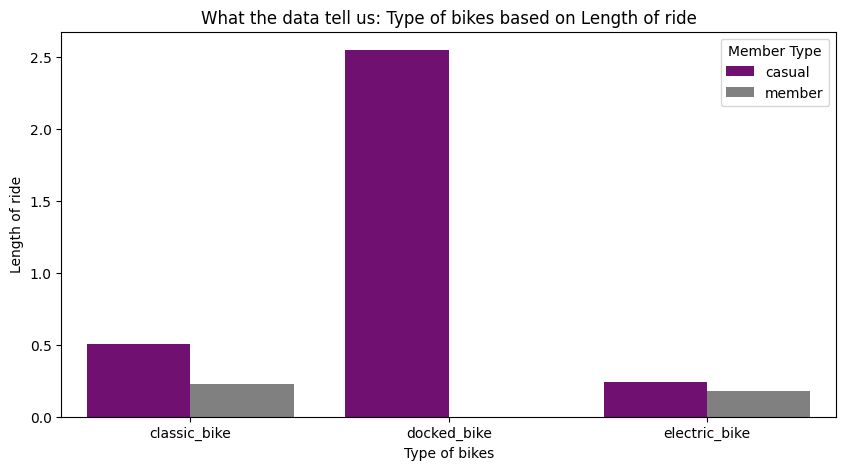

In [15]:
divvy_bike = divvy16.groupby(['member_casual','rideable_type'])['ride_length'].mean().reset_index()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='rideable_type', y='ride_length', hue='member_casual', data=divvy_bike, palette=color_mc)

# Customize
plt.title('What the data tell us: Type of bikes based on Length of ride')
plt.xlabel('Type of bikes')
plt.ylabel('Length of ride')

# Show plot
plt.legend(title='Member Type')
plt.show()

It seems that electric bike are not commonly used for longer trips. This could be utilized and marketed to the general public.

# Summary and Recommendations

## Summary:

1. Those who are members used the service as a mode of transportation for their daily activities, as most of them use the service right before and right after working hours. They could be students or office worker going to and from work. <br>
2. Casual riders are likely to be tourists or younger/older people who wish to ride for leisure on any day, and have a tendency to go on rides before and around sunset.<br>
3. There are more rides made by members than other riders.<br>
4. Most bikes used are taken at their docks, though classic bikes more than electric bikes.<br>

## Recommendations

**Strategies that could be implemented for casual riders to purchase an annual membership:** <br>
● Place advertisements around denser areas, especially where traffic are high. Bikes are more convenient that larger forms of transportation and can encourage people to choose as a form of daily commute. <br>
● Integrate the marketing of cycling as a way to exercise near parks or less crowded paths or sceneric paths, this can appeal to young adults and older people alike. <br>
● Consider hightlighting on the accessiblity of different bikes, which is an incentive for family to choose the service and purchase memberships, specifically those with young children. <br>

**Strategies that could attract more riders:** <br>
● Zone in on tourists: colorful bikes with attractive patterns, use social media to advertise beautiful landscapes accessible by bikes, suggestions of sight-seeing on a bicycle